# 手动实现经典NLP模型算法——seq2seq

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.sequence import load_data, get_vocab
from seq2seq.seq2seq import Seq2seq
from common.optimizer import Adam
from common.utils import Trainer, eval_seq2seq

## Ⅰ、加载加法序列数据集

In [3]:
(x_train, t_train), (x_test, t_test) = load_data('addition.txt', seed=1984)
char_to_id, id_to_char = get_vocab()

print(x_train.shape, t_train.shape)
print(x_test.shape, t_test.shape)

print(x_train[0])
print(t_train[0])

print(''.join([id_to_char[c] for c in x_train[0]]))
print(''.join([id_to_char[c] for c in t_train[0]]))

(45000, 7) (45000, 5)
(5000, 7) (5000, 5)
[ 3  0  2  0  0 11  5]
[ 6  0 11  7  5]
71+118 
_189 


## Ⅱ、创建Seq2seq网络模型

In [4]:
# 定义超参数
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

In [5]:
# 优化：反转输入
is_reverse = True
if is_reverse:
  x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]

In [6]:
# 定义模型
model = Seq2seq(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

## Ⅲ、模型训练并评估

| epoch 1 |  iter 1 / 351 | time 0[s] | loss 2.57
| epoch 1 |  iter 21 / 351 | time 0[s] | loss 2.48
| epoch 1 |  iter 41 / 351 | time 2[s] | loss 2.20
| epoch 1 |  iter 61 / 351 | time 4[s] | loss 1.99
| epoch 1 |  iter 81 / 351 | time 5[s] | loss 1.89
| epoch 1 |  iter 101 / 351 | time 6[s] | loss 1.82
| epoch 1 |  iter 121 / 351 | time 6[s] | loss 1.82
| epoch 1 |  iter 141 / 351 | time 7[s] | loss 1.80
| epoch 1 |  iter 161 / 351 | time 8[s] | loss 1.79
| epoch 1 |  iter 181 / 351 | time 10[s] | loss 1.78
| epoch 1 |  iter 201 / 351 | time 10[s] | loss 1.77
| epoch 1 |  iter 221 / 351 | time 11[s] | loss 1.76
| epoch 1 |  iter 241 / 351 | time 11[s] | loss 1.76
| epoch 1 |  iter 261 / 351 | time 12[s] | loss 1.75
| epoch 1 |  iter 281 / 351 | time 12[s] | loss 1.74
| epoch 1 |  iter 301 / 351 | time 13[s] | loss 1.74
| epoch 1 |  iter 321 / 351 | time 14[s] | loss 1.73
| epoch 1 |  iter 341 / 351 | time 14[s] | loss 1.73
Q 77+85  
T 162 
☒ 100 
---
Q 975+164
T 1139
☒ 1013
---
Q 582

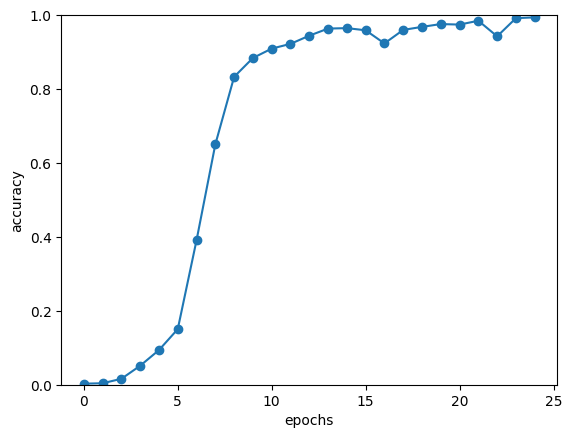

In [7]:
acc_list = []
for epoch in range(max_epoch):
  trainer.fit(x_train, t_train, max_epoch=1, batch_size=batch_size, max_grad=max_grad)

  correct_num = 0
  for i in range(len(x_test)):
    question, correct = x_test[[i]], t_test[[i]]
    verbose = i < 10
    correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose, is_reverse)

  acc = float(correct_num) / len(x_test)
  acc_list.append(acc)
  print('val acc %.3f%%' % (acc * 100))

x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.show()